In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import NearMiss


In [2]:
stroke_risk = pd.read_csv('../00-data/healthcare-dataset-stroke-data.csv')

stroke_risk

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


* rimuovere l'id dal dataset
* eseguire onehotencoding su:
  - gender
  - ever_married
  - work_type
  - Residence_type
  - smoking_status
* eseguire standardizzazione su:
  - age
  - avg_glucose_level
  - bmi

In [3]:
to_remove = ['id']
to_1he = ['work_type', 'smoking_status']
to_01 = ['gender', 'Residence_type', 'ever_married']
to_normalize = ['age', 'avg_glucose_level', 'bmi']

mapping_dict = {
    'gender': {'Male': 1, 'Female': 0},
    'Residence_type': {'Urban': 1, 'Rural': 0},
    'ever_married': {'Yes': 1, 'No': 0}
}

In [4]:
stroke_risk_cp  = stroke_risk.copy()
stroke_risk_cp = stroke_risk_cp.drop(to_remove, axis=1)
stroke_risk_cp

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
stroke_risk_cp = pd.get_dummies(stroke_risk_cp, columns=to_1he, drop_first=True)
for col in to_01:
  stroke_risk_cp[col] = stroke_risk_cp[col].map(mapping_dict[col])

In [6]:
stroke_risk_cp

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,67.0,0,1,1,1,228.69,36.6,1,False,True,False,False,True,False,False
1,0.0,61.0,0,0,1,0,202.21,NaN,1,False,False,True,False,False,True,False
2,1.0,80.0,0,1,1,0,105.92,32.5,1,False,True,False,False,False,True,False
3,0.0,49.0,0,0,1,1,171.23,34.4,1,False,True,False,False,False,False,True
4,0.0,79.0,1,0,1,0,174.12,24.0,1,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1,0,1,1,83.75,NaN,0,False,True,False,False,False,True,False
5106,0.0,81.0,0,0,1,1,125.20,40.0,0,False,False,True,False,False,True,False
5107,0.0,35.0,0,0,1,0,82.99,30.6,0,False,False,True,False,False,True,False
5108,1.0,51.0,0,0,1,0,166.29,25.6,0,False,True,False,False,True,False,False


In [7]:
stroke_risk_cp.shape

(5110, 16)

In [8]:
X = stroke_risk_cp.drop(['stroke'], axis=1).values

y = stroke_risk_cp['stroke'].values

print(f'X: {X.shape}, y: {y.shape}')

X: (5110, 15), y: (5110,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

print(f'Train predict {accuracy_score(y_train, y_train_pred)}')
print(f'Test predict {accuracy_score(y_test, y_test_pred)}')

Train predict 1.0
Test predict 0.9158512720156555


l'albero, per quanto dia ottime performance sembra overfittare, provo a ridurre la complessità e magari in un secondo momento ridurre le età

In [11]:
dtc = DecisionTreeClassifier(max_depth=6)

dtc.fit(X_train, y_train)

y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

print(f'Train predict {accuracy_score(y_train, y_train_pred)}')
print(f'Test predict {accuracy_score(y_test, y_test_pred)}')

Train predict 0.9593933463796478
Test predict 0.9393346379647749


depth 100
Train predict 1.0000
Test predict 0.9149


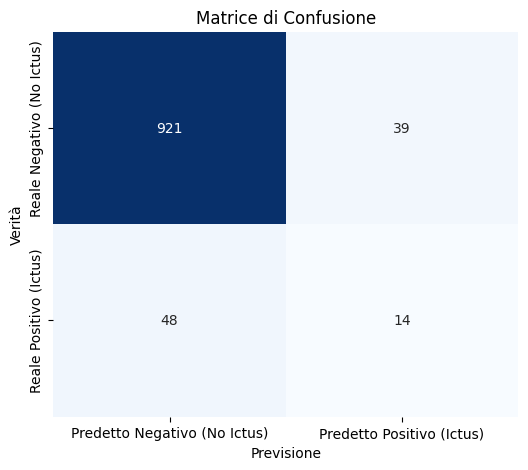

-------------------------------------------------------
depth 101
Train predict 1.0000
Test predict 0.9159


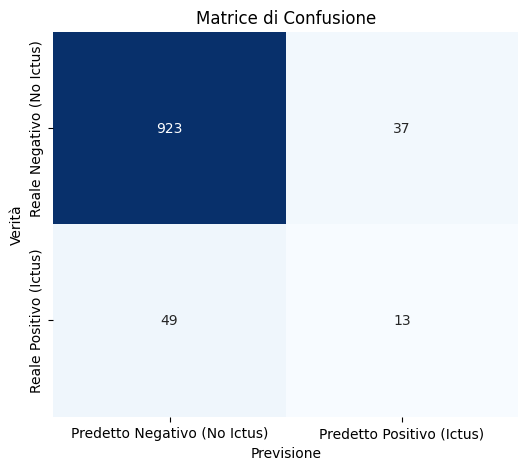

-------------------------------------------------------
depth 102
Train predict 1.0000
Test predict 0.9149


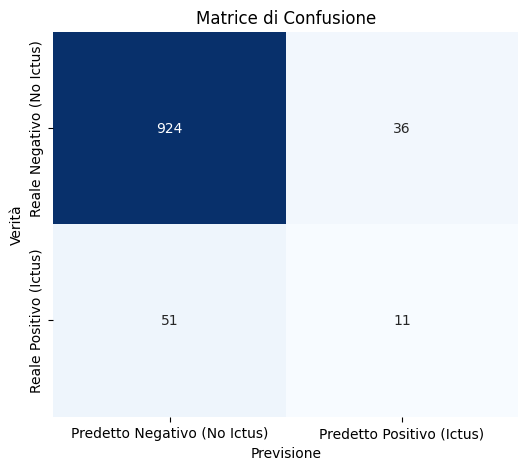

-------------------------------------------------------
depth 103
Train predict 1.0000
Test predict 0.9139


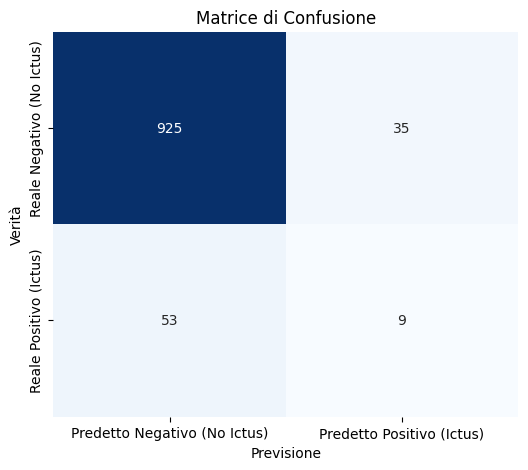

-------------------------------------------------------
depth 104
Train predict 1.0000
Test predict 0.9227


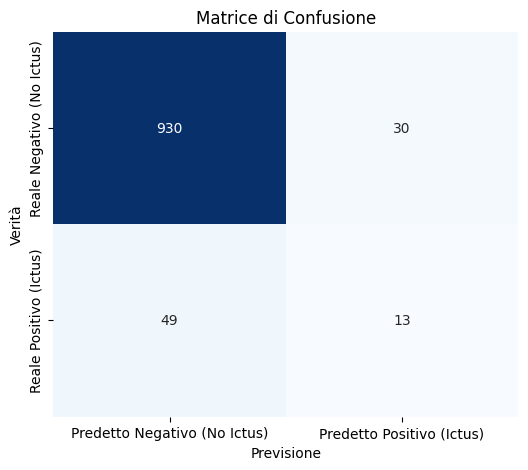

-------------------------------------------------------
depth 105
Train predict 0.9998
Test predict 0.9149


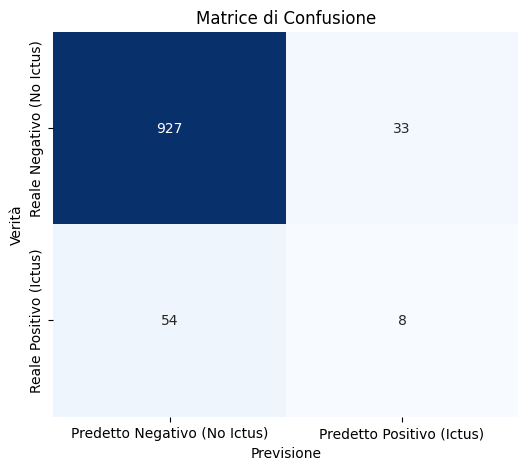

-------------------------------------------------------
depth 106
Train predict 1.0000
Test predict 0.9129


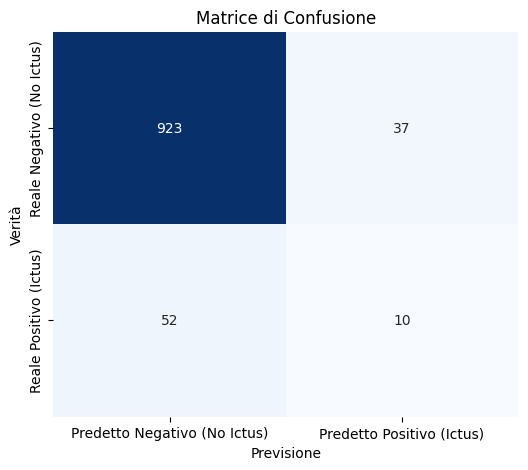

-------------------------------------------------------
depth 107
Train predict 0.9998
Test predict 0.9139


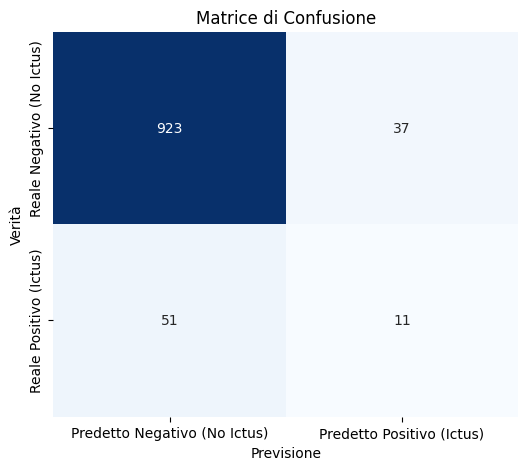

-------------------------------------------------------
depth 108
Train predict 1.0000
Test predict 0.9188


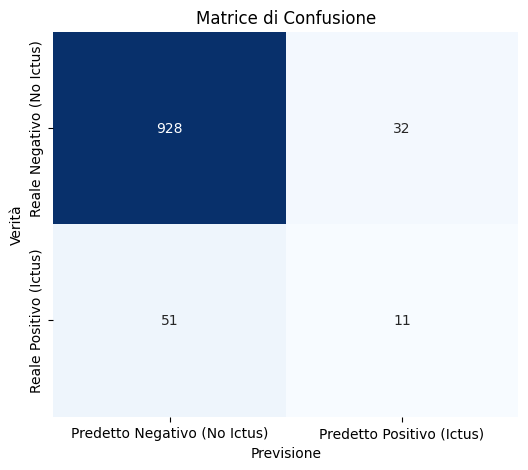

-------------------------------------------------------
depth 109
Train predict 1.0000
Test predict 0.9168


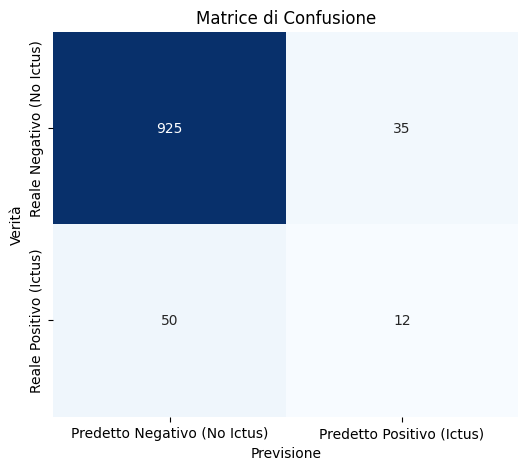

-------------------------------------------------------
depth 110
Train predict 1.0000
Test predict 0.9110


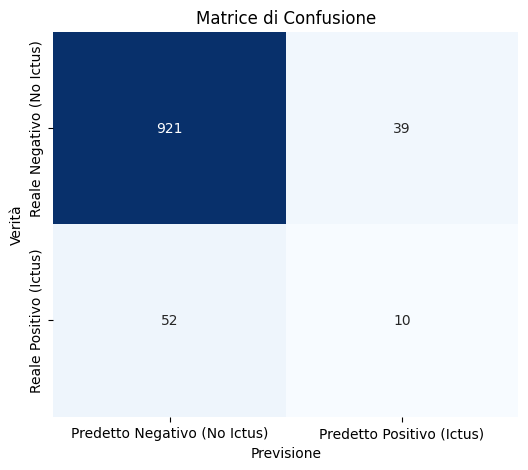

-------------------------------------------------------
depth 111
Train predict 1.0000
Test predict 0.9159


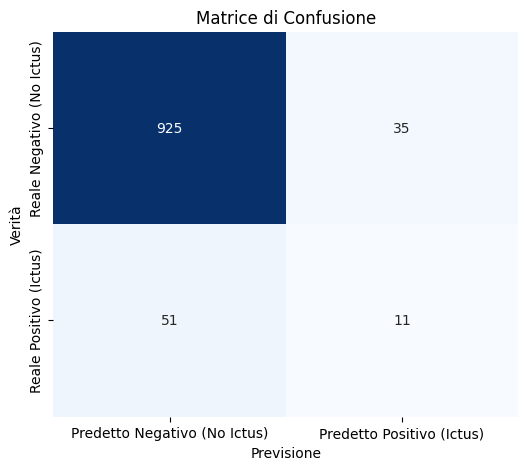

-------------------------------------------------------
depth 112
Train predict 1.0000
Test predict 0.9168


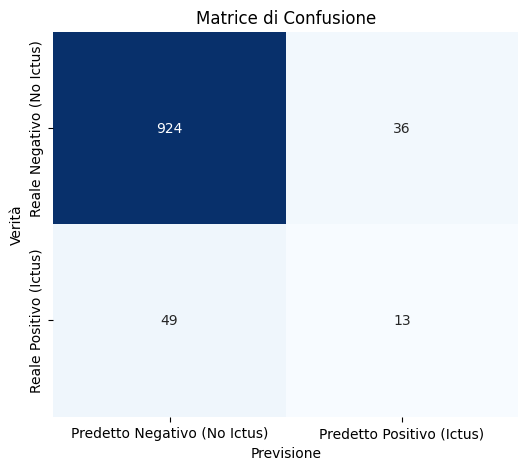

-------------------------------------------------------
depth 113
Train predict 1.0000
Test predict 0.9159


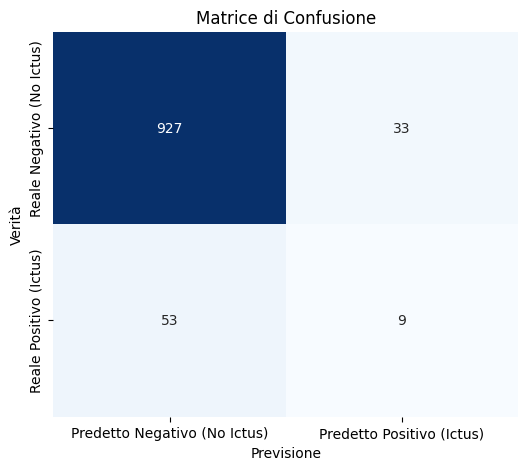

-------------------------------------------------------
depth 114
Train predict 1.0000
Test predict 0.9159


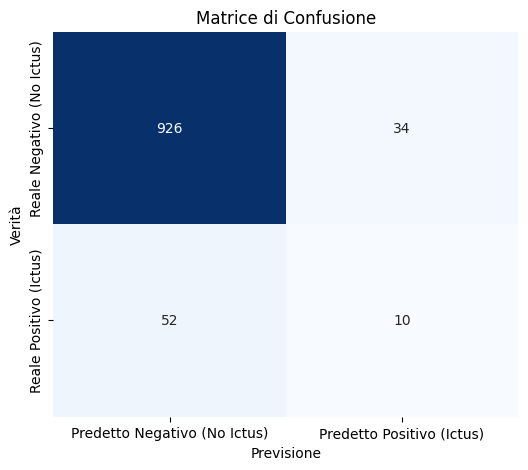

-------------------------------------------------------
depth 115
Train predict 1.0000
Test predict 0.9198


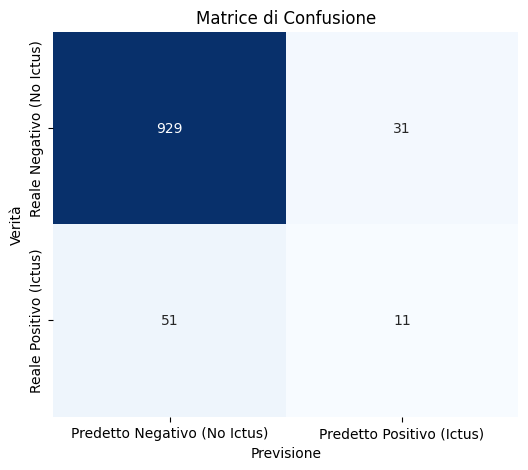

-------------------------------------------------------
depth 116
Train predict 1.0000
Test predict 0.9207


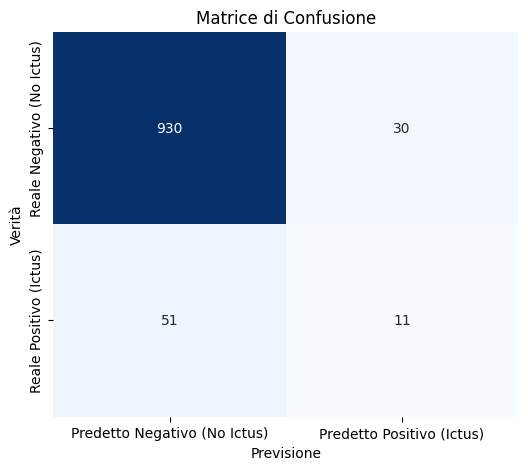

-------------------------------------------------------
depth 117
Train predict 1.0000
Test predict 0.9188


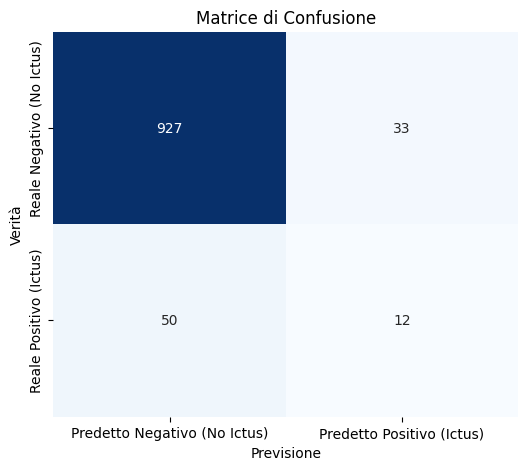

-------------------------------------------------------
depth 118
Train predict 1.0000
Test predict 0.9159


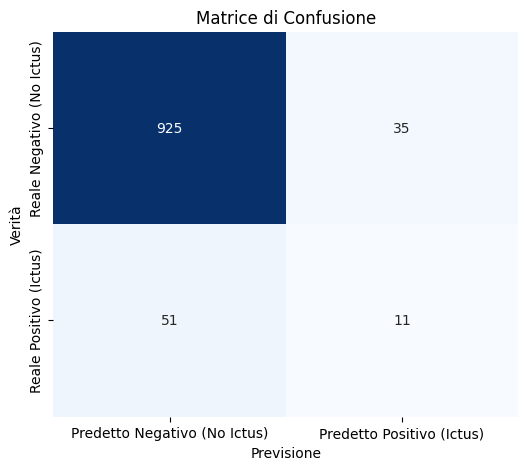

-------------------------------------------------------
depth 119
Train predict 1.0000
Test predict 0.9178


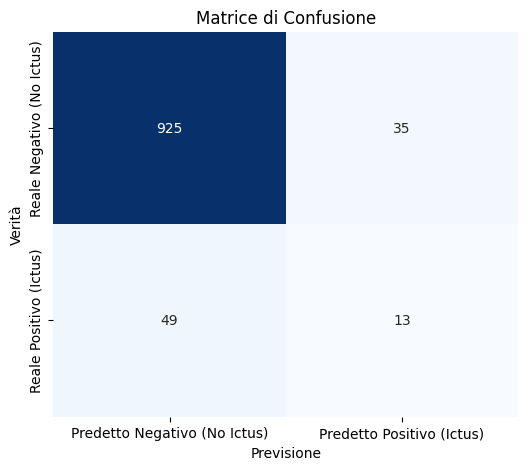

-------------------------------------------------------


In [12]:
for max_dept in range(100,120):
  print(f'depth {max_dept}')
  dtc = DecisionTreeClassifier(max_depth=max_dept)

  dtc.fit(X_train, y_train)

  y_train_pred = dtc.predict(X_train)
  y_test_pred = dtc.predict(X_test)

  print(f'Train predict {accuracy_score(y_train, y_train_pred):.4f}')
  print(f'Test predict {accuracy_score(y_test, y_test_pred):.4f}')
  
  cm = confusion_matrix(y_test, y_test_pred)
  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Predetto Negativo (No Ictus)', 'Predetto Positivo (Ictus)'],
              yticklabels=['Reale Negativo (No Ictus)', 'Reale Positivo (Ictus)'])
  plt.xlabel('Previsione')
  plt.ylabel('Verità')
  plt.title('Matrice di Confusione')
  plt.show()

  print('-------------------------------------------------------')

i dati sembrano creare molti falsi negativi, e questo è impensabile da applicare in una realtà medica.
proviamo a concentrarci su diverse età

min_age: 0
Train predict 0.9995
Test predict 0.9119


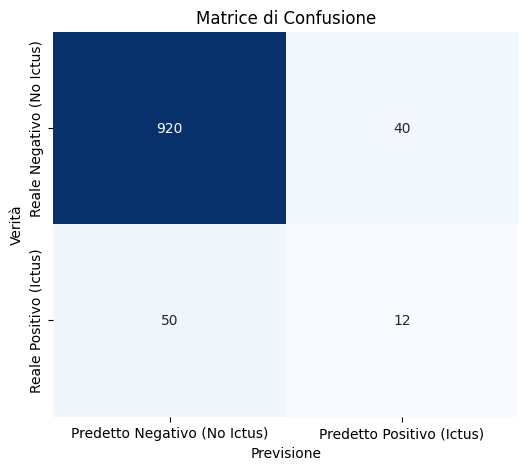

-------------------------------------------------------
min_age: 45
Train predict 1.0000
Test predict 0.8391


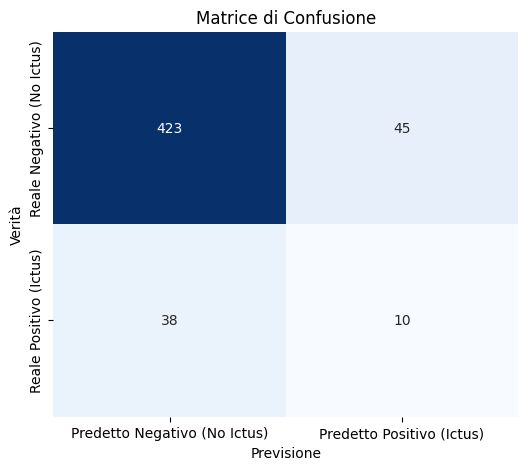

-------------------------------------------------------
min_age: 50
Train predict 1.0000
Test predict 0.8235


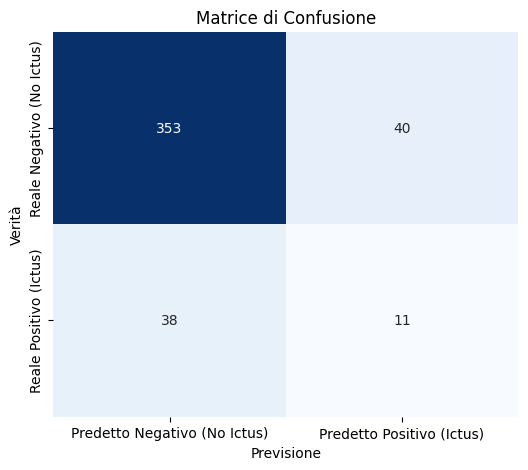

-------------------------------------------------------
min_age: 55
Train predict 0.9993
Test predict 0.8006


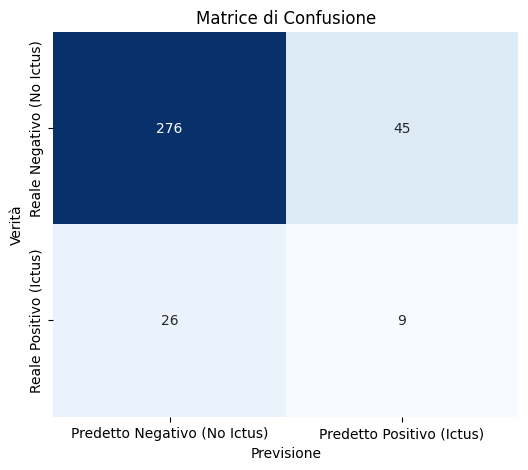

-------------------------------------------------------
min_age: 60
Train predict 1.0000
Test predict 0.7754


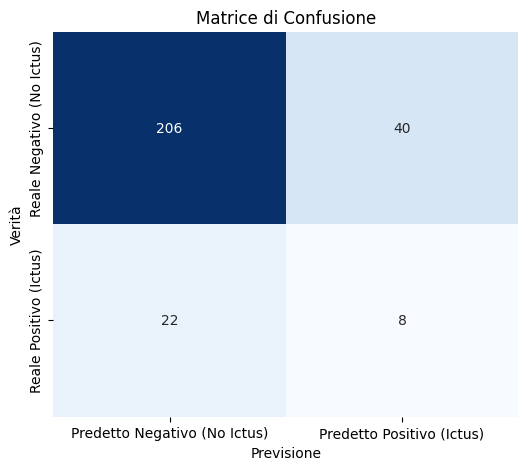

-------------------------------------------------------
min_age: 65
Train predict 1.0000
Test predict 0.8010


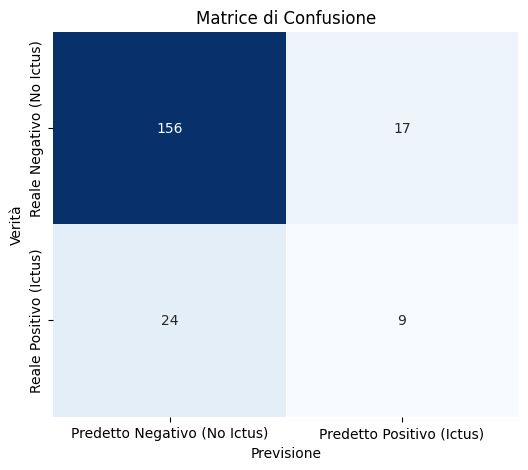

-------------------------------------------------------
min_age: 70
Train predict 1.0000
Test predict 0.6490


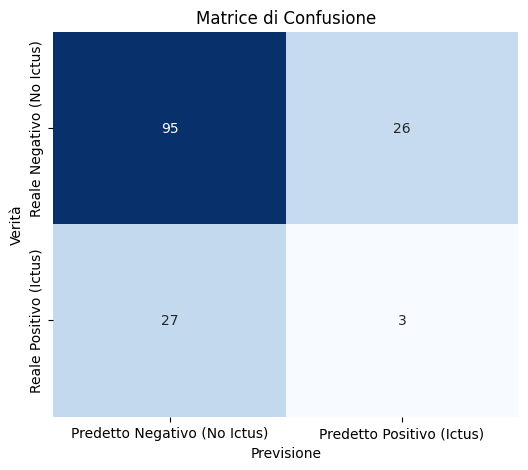

-------------------------------------------------------
min_age: 75
Train predict 0.9928
Test predict 0.6731


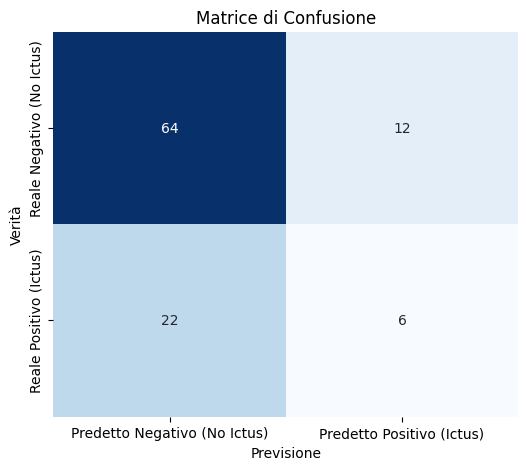

-------------------------------------------------------
min_age: 80
Train predict 1.0000
Test predict 0.6842


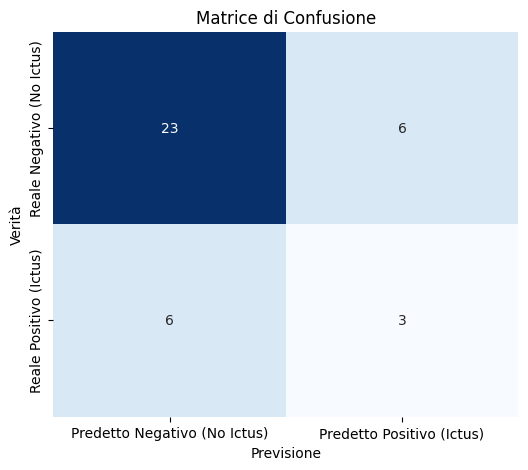

-------------------------------------------------------


In [13]:
min_ages = [0, 45,50,55,60, 65, 70, 75, 80]

for min_age in min_ages:
  print(f'min_age: {min_age}')
  stroke_risk_year = stroke_risk_cp[stroke_risk_cp['age'] >= min_age]
  stroke_risk
  
  X = stroke_risk_cp[stroke_risk_cp['age'] >= min_age].drop(['stroke'], axis=1).values
  y = stroke_risk_cp[stroke_risk_cp['age'] >= min_age]['stroke'].values
  
  X_train_year, X_test_year, y_train_year, y_test_year = train_test_split(X, y, test_size=0.2, random_state=42)
  
  dtc = DecisionTreeClassifier()

  dtc.fit(X_train_year, y_train_year)

  y_train_pred = dtc.predict(X_train_year)
  y_test_pred = dtc.predict(X_test_year)

  print(f'Train predict {accuracy_score(y_train_year, y_train_pred):.4f}')
  print(f'Test predict {accuracy_score(y_test_year, y_test_pred):.4f}')
  
  cm = confusion_matrix(y_test_year, y_test_pred)
  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Predetto Negativo (No Ictus)', 'Predetto Positivo (Ictus)'],
              yticklabels=['Reale Negativo (No Ictus)', 'Reale Positivo (Ictus)'])
  plt.xlabel('Previsione')
  plt.ylabel('Verità')
  plt.title('Matrice di Confusione')
  plt.show()

  print('-------------------------------------------------------')

In [14]:
stroke_risk_cp.isnull().sum()

gender                              1
age                                 0
hypertension                        0
heart_disease                       0
ever_married                        0
Residence_type                      0
avg_glucose_level                   0
bmi                               201
stroke                              0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

In [15]:
stroke_cleaned = stroke_risk_cp[~stroke_risk_cp['bmi'].isnull()]
stroke_cleaned_null = ~stroke_risk_cp['gender'].isnull()
stroke_cleaned = stroke_cleaned[stroke_cleaned_null]

stroke_cleaned

C:\Users\David\AppData\Local\Temp\ipykernel_25784\2759396873.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stroke_cleaned = stroke_cleaned[stroke_cleaned_null]


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,67.0,0,1,1,1,228.69,36.6,1,False,True,False,False,True,False,False
2,1.0,80.0,0,1,1,0,105.92,32.5,1,False,True,False,False,False,True,False
3,0.0,49.0,0,0,1,1,171.23,34.4,1,False,True,False,False,False,False,True
4,0.0,79.0,1,0,1,0,174.12,24.0,1,False,False,True,False,False,True,False
5,1.0,81.0,0,0,1,1,186.21,29.0,1,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,13.0,0,0,0,0,103.08,18.6,0,False,False,False,True,False,False,False
5106,0.0,81.0,0,0,1,1,125.20,40.0,0,False,False,True,False,False,True,False
5107,0.0,35.0,0,0,1,0,82.99,30.6,0,False,False,True,False,False,True,False
5108,1.0,51.0,0,0,1,0,166.29,25.6,0,False,True,False,False,True,False,False


In [16]:
stroke_cleaned.index.tolist()

[0,
 2,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 28,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 44,
 45,
 47,
 48,
 49,
 52,
 53,
 55,
 56,
 58,
 59,
 60,
 61,
 62,
 63,
 65,
 66,
 67,
 68,
 69,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 79,
 80,
 82,
 83,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 106,
 107,
 108,
 109,
 110,
 111,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 125,
 127,
 128,
 130,
 131,
 132,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 147,
 148,
 149,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 163,
 164,
 165,
 166,
 168,
 169,
 172,
 173,
 175,
 176,
 177,
 179,
 180,
 181,
 182,
 184,
 185,
 186,
 187,
 188,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 199,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 219,

In [17]:
stroke_remained = stroke_risk_cp[~stroke_risk_cp.index.isin(stroke_cleaned.index)]

stroke_remained

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1,0.0,61.0,0,0,1,0,202.21,NaN,1,False,False,True,False,False,True,False
8,0.0,59.0,0,0,1,0,76.15,NaN,1,False,True,False,False,False,False,False
13,1.0,78.0,0,1,1,1,219.84,NaN,1,False,True,False,False,False,False,False
19,1.0,57.0,0,1,0,1,217.08,NaN,1,False,False,False,False,False,False,False
27,1.0,58.0,0,0,1,0,189.84,NaN,1,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,1.0,41.0,0,0,0,0,70.15,NaN,0,False,True,False,False,True,False,False
5048,1.0,40.0,0,0,1,1,191.15,NaN,0,False,True,False,False,False,False,True
5093,0.0,45.0,1,0,1,0,95.02,NaN,0,False,False,False,False,False,False,True
5099,1.0,40.0,0,0,1,0,83.94,NaN,0,False,True,False,False,False,False,True


In [18]:
X_cleaned = stroke_cleaned.drop(['stroke'], axis=1).values
y_cleaned = stroke_cleaned['stroke'].values



In [19]:
nm = NearMiss(sampling_strategy='auto', version=1, n_neighbors=3) # n_neighbors è k
X_train_resampled, y_train_resampled = nm.fit_resample(X_cleaned, y_cleaned)

print(f'X_train_resampled: {X_train_resampled.shape}')
print(f'y_train_resampled: {y_train_resampled.shape}')



X_train_resampled: (418, 15)
y_train_resampled: (418,)


In [20]:
stroke_risk_cp_id = stroke_risk_cp
stroke_risk_cp_id['id'] = stroke_risk['id']
stroke_risk_cp_id

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,id
0,1.0,67.0,0,1,1,1,228.69,36.6,1,False,True,False,False,True,False,False,9046
1,0.0,61.0,0,0,1,0,202.21,NaN,1,False,False,True,False,False,True,False,51676
2,1.0,80.0,0,1,1,0,105.92,32.5,1,False,True,False,False,False,True,False,31112
3,0.0,49.0,0,0,1,1,171.23,34.4,1,False,True,False,False,False,False,True,60182
4,0.0,79.0,1,0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,1665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1,0,1,1,83.75,NaN,0,False,True,False,False,False,True,False,18234
5106,0.0,81.0,0,0,1,1,125.20,40.0,0,False,False,True,False,False,True,False,44873
5107,0.0,35.0,0,0,1,0,82.99,30.6,0,False,False,True,False,False,True,False,19723
5108,1.0,51.0,0,0,1,0,166.29,25.6,0,False,True,False,False,True,False,False,37544


Train predict 1.0


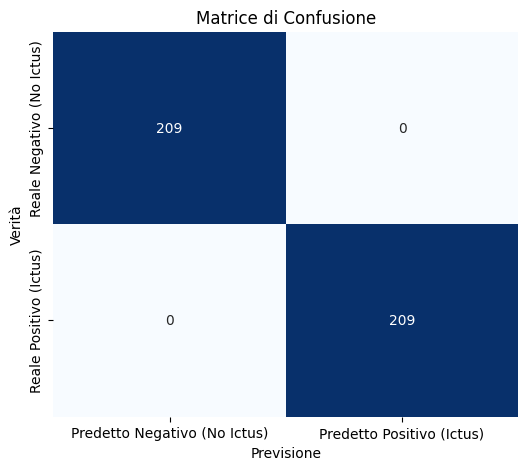

In [21]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train_resampled, y_train_resampled)

y_train_resampled_pred = dtc.predict(X_train_resampled)

print(f'Train predict {accuracy_score(y_train_resampled, y_train_resampled_pred)}')

cm = confusion_matrix(y_train_resampled, y_train_resampled_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predetto Negativo (No Ictus)', 'Predetto Positivo (Ictus)'],
            yticklabels=['Reale Negativo (No Ictus)', 'Reale Positivo (Ictus)'])
plt.xlabel('Previsione')
plt.ylabel('Verità')
plt.title('Matrice di Confusione')
plt.show()


# y_test_pred = dtc.predict(X_test)
# 
# print(f'Train predict {accuracy_score(y_train, y_train_pred)}')
# print(f'Test predict {accuracy_score(y_test, y_test_pred)}')

probabilmente sta overfittando, proviamo i casi di test

In [22]:
# X_test_resampled = stroke_remained.drop(['id', 'stroke'], axis=1)

# y_test_resampled = stroke_remained['stroke']



# y_test_resampled_pred = dtc.predict(X_test_resampled)

# print(f'Train predict {accuracy_score(y_test_resampled, y_test_resampled_pred)}')

# cm = confusion_matrix(y_test_resampled, y_test_resampled_pred)
# plt.figure(figsize=(6, 5))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
#             xticklabels=['Predetto Negativo (No Ictus)', 'Predetto Positivo (Ictus)'],
#             yticklabels=['Reale Negativo (No Ictus)', 'Reale Positivo (Ictus)'])
# plt.xlabel('Previsione')
# plt.ylabel('Verità')
# plt.title('Matrice di Confusione')
# plt.show()




In [23]:
for max_dept in range (1, 15):
  print(f'max_dept={max_dept}')
  dtc = DecisionTreeClassifier(max_depth=max_dept)

  dtc.fit(X_train_resampled, y_train_resampled)

  y_train_resampled_pred = dtc.predict(X_train_resampled)

  #print(f'Train predict {accuracy_score(y_train_resampled, y_train_resampled_pred)}')

  #cm = confusion_matrix(y_train_resampled, y_train_resampled_pred)
  #plt.figure(figsize=(6, 5))
  #sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
  #            xticklabels=['Predetto Negativo (No Ictus)', 'Predetto Positivo (Ictus)'],
  #            yticklabels=['Reale Negativo (No Ictus)', 'Reale Positivo (Ictus)'])
  #plt.xlabel('Previsione')
  #plt.ylabel('Verità')
  #plt.title('Matrice di Confusione')
  #plt.show()

  #------

  X_test_resampled = stroke_remained.drop(['id', 'stroke'], axis=1)

  y_test_resampled = stroke_remained['stroke']



  y_test_resampled_pred = dtc.predict(X_test_resampled)

  print(f'Test predict {accuracy_score(y_test_resampled, y_test_resampled_pred)}')

  cm = confusion_matrix(y_test_resampled, y_test_resampled_pred)
  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Predetto Negativo (No Ictus)', 'Predetto Positivo (Ictus)'],
              yticklabels=['Reale Negativo (No Ictus)', 'Reale Positivo (Ictus)'])
  plt.xlabel('Previsione')
  plt.ylabel('Verità')
  plt.title('Matrice di Confusione')
  plt.show()

  print('-'*30)


# y_test_pred = dtc.predict(X_test)
# 
# print(f'Train predict {accuracy_score(y_train, y_train_pred)}')
# print(f'Test predict {accuracy_score(y_test, y_test_pred)}')

max_dept=1


KeyError: "['id'] not found in axis"

In [ ]:
print(y_train_resampled_pred.shape)
print(y_test_resampled_pred.shape)

(418,)
(202,)
